<a href="https://colab.research.google.com/github/davdevv/ML_position_assignment/blob/main/Task_2/notebooks/overview.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os
import torch
from torch.utils.data import Dataset
import matplotlib.pyplot as plt
import numpy as np

# Клонируем репозиторий

In [2]:
!git clone https://github.com/davdevv/ML_position_assignment.git

Cloning into 'ML_position_assignment'...
remote: Enumerating objects: 143, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 143 (delta 7), reused 2 (delta 0), pack-reused 121
Receiving objects: 100% (143/143), 38.05 KiB | 12.68 MiB/s, done.
Resolving deltas: 100% (48/48), done.


# Скачиваем с диска чекпоинт и маленький датасет для тестирования модели

In [3]:
!gdown '1AHZ8soHuE7WalZJ1U1gWuYUFrFoXWV31'

Downloading...
From: https://drive.google.com/uc?id=1AHZ8soHuE7WalZJ1U1gWuYUFrFoXWV31
To: /content/audio_denoising_chpt.pth
100% 654k/654k [00:00<00:00, 76.4MB/s]


In [4]:
!gdown '1fab1Cahh4ohBSr-RPBN7O0Io9xqYpko7'

Downloading...
From: https://drive.google.com/uc?id=1fab1Cahh4ohBSr-RPBN7O0Io9xqYpko7
To: /content/small_dataset.zip
100% 8.29M/8.29M [00:00<00:00, 15.0MB/s]


In [5]:
from zipfile import ZipFile
file_name = "small_dataset.zip"
with ZipFile(file_name, 'r') as zip:
    #zip.printdir()
    zip.extractall()

# Импортируем модель и наш кастомный датасет

In [6]:
from ML_position_assignment.Task_2.model import ResidualDenseNetwork
from ML_position_assignment.Task_2.dataset import load, CustomDataset

# Инициализруем модель

In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = ResidualDenseNetwork(3, 1, 10, 12, 7, 6).to(device)
model.load_state_dict(torch.load('audio_denoising_chpt.pth'))
model.half();

# Сравниваем чистый, зашумленный и очищенный сигналы

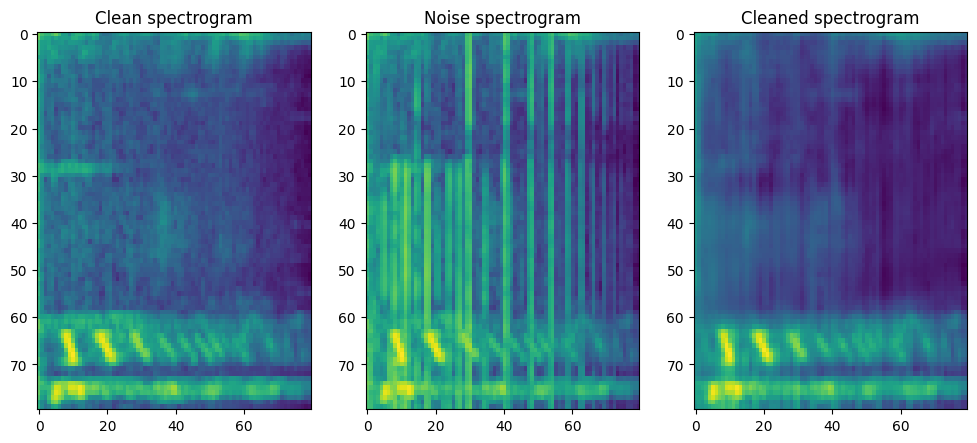

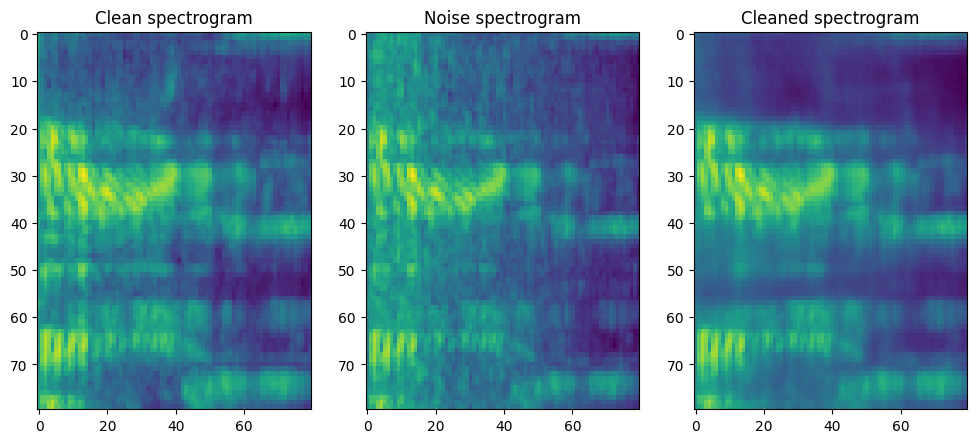

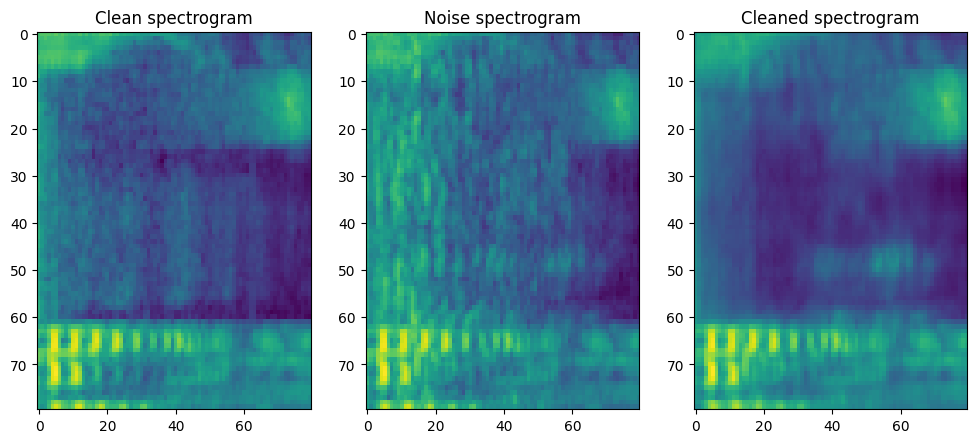

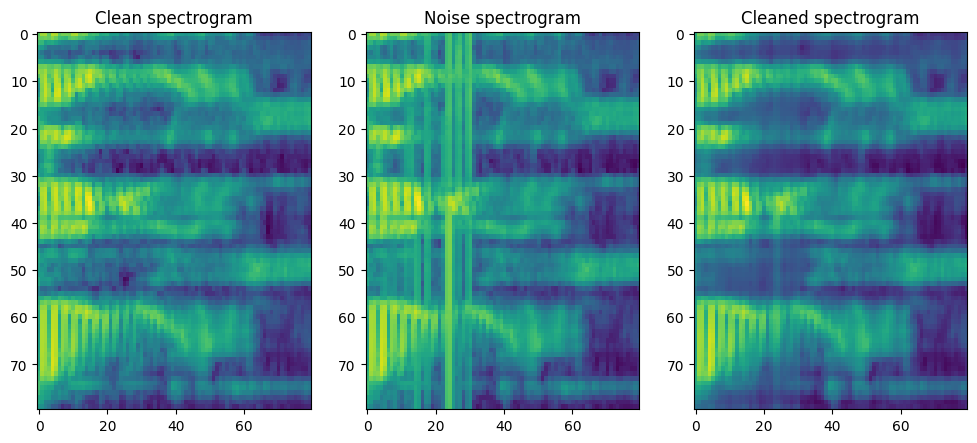

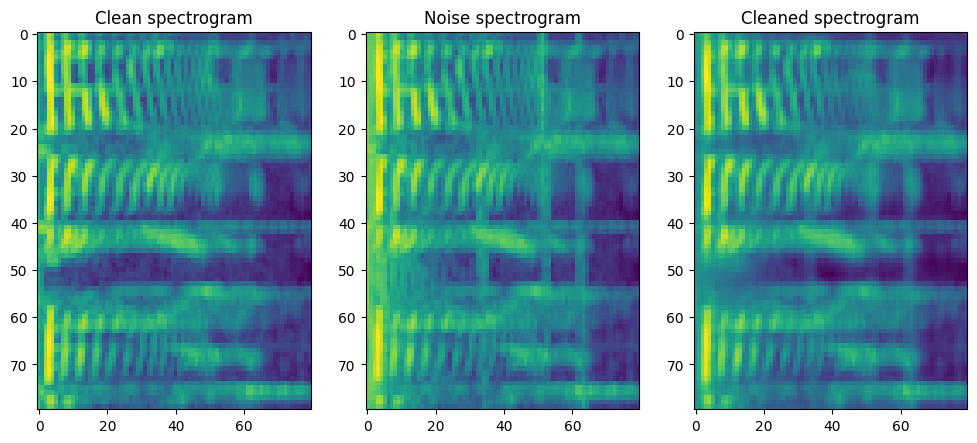

In [11]:
def show_random_sample(dataset, model):
    idx = np.random.randint(len(dataset))
    clean_spectrogram, noise_spectrogram = dataset[idx]
    clean_spectrogram, noise_spectrogram = clean_spectrogram.squeeze(), noise_spectrogram.squeeze()
    random_indices = torch.randint(low=0, high=(clean_spectrogram.size()[0] - 80), size=(1,))
    clean_spectrogram, noise_spectrogram = clean_spectrogram[random_indices:(random_indices+80)], noise_spectrogram[random_indices:(random_indices+80)]
    fig = plt.figure(figsize=(12, 5), dpi=100)
    ax1 = fig.add_subplot(131)
    ax2 = fig.add_subplot(132)
    ax3 = fig.add_subplot(133)
    ax1.imshow(clean_spectrogram, interpolation='nearest', aspect='auto')
    ax1.set_title('Clean spectrogram')
    ax2.imshow(noise_spectrogram, interpolation='nearest', aspect='auto')
    ax2.set_title('Noise spectrogram')
    ax3.imshow(model(noise_spectrogram[None, None, :, :].to(device)).data.to("cpu").squeeze(), interpolation='nearest', aspect='auto')
    ax3.set_title('Cleaned spectrogram')
train_dataset = CustomDataset('small_dataset')
for i in range(5):
    show_random_sample(train_dataset, model = model)